# Machine Learning Fundamentals - Cumulative Lab

## Introduction

In this cumulative lab, you will work through an end-to-end machine learning workflow, focusing on the fundamental concepts of machine learning theory and processes. The main emphasis is on modeling theory (not EDA or preprocessing), so we will skip over some of the data visualization and data preparation steps that you would take in an actual modeling process.

## Objectives

You will be able to:

* Recall the purpose of, and practice performing, a train-test split
* Recall the difference between bias and variance
* Practice identifying bias and variance in model performance
* Practice applying strategies to minimize bias and variance
* Practice selecting a final model and evaluating it on a holdout set

## Your Task: Build a Model to Predict Blood Pressure

![stethoscope sitting on a case](images/stethoscope.jpg)

<span>Photo by <a href="https://unsplash.com/@marceloleal80?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Marcelo Leal</a> on <a href="https://unsplash.com/s/photos/blood-pressure?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>

### Business and Data Understanding

Hypertension (high blood pressure) is a treatable condition, but measuring blood pressure requires specialized equipment that most people do not have at home.

The question, then, is ***can we predict blood pressure using just a scale and a tape measure***? These measuring tools, which individuals are more likely to have at home, might be able to flag individuals with an increased risk of hypertension.

[Researchers in Brazil](https://doi.org/10.1155/2014/637635) collected data from several hundred college students in order to answer this question. We will be specifically using the data they collected from female students.

The measurements we have are:

* Age (age in years)
* BMI (body mass index, a ratio of weight to height)
* WC (waist circumference in centimeters)
* HC (hip circumference in centimeters)
* WHR (waist-hip ratio)
* SBP (systolic blood pressure)

The chart below describes various blood pressure values:

<a title="Ian Furst, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Hypertension_ranges_chart.png"><img width="512" alt="Hypertension ranges chart" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8b/Hypertension_ranges_chart.png/512px-Hypertension_ranges_chart.png"></a>

### Requirements

#### 1. Perform a Train-Test Split

Load the data into a dataframe using pandas, separate the features (`X`) from the target (`y`), and use the `train_test_split` function to separate data into training and test sets.

#### 2. Build and Evaluate a First Simple Model

Using the `LinearRegression` model and `mean_squared_error` function from scikit-learn, build and evaluate a simple linear regression model using the training data. Also, use `cross_val_score` to simulate unseen data, without actually using the holdout test set.

#### 3. Use `PolynomialFeatures` to Reduce Underfitting

Apply a `PolynomialFeatures` transformer to give the model more ability to pick up on information from the training data. Test out different polynomial degrees until you have a model that is perfectly fit to the training data.

#### 4. Use Regularization to Reduce Overfitting

Instead of a basic `LinearRegression`, use a `Ridge` regression model to apply regularization to the overfit model. In order to do this you will need to scale the data. Test out different regularization penalties to find the best model.

#### 5. Evaluate a Final Model on the Test Set

Preprocess `X_test` and `y_test` appropriately in order to evaluate the performance of your final model on unseen data.

## 1. Perform a Train-Test Split

Before looking at the text below, try to remember: why is a train-test split the *first* step in a machine learning process?

---

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

A machine learning (predictive) workflow fundamentally emphasizes creating *a model that will perform well on unseen data*. We will hold out a subset of our original data as the "test" set that will stand in for truly unseen data that the model will encounter in the future.

We make this separation as the first step for two reasons:

1. Most importantly, we are avoiding *leakage* of information from the test set into the training set. Leakage can lead to inflated metrics, since the model has information about the "unseen" data that it won't have about real unseen data. This is why we always want to fit our transformers and models on the training data only, not the full dataset.
2. Also, we want to make sure the code we have written will actually work on unseen data. If we are able to transform our test data and evaluate it with our final model, that's a good sign that the same process will work for future data as well.
    
</details>


### Loading the Data

In the cell below, we import the pandas library and open the full dataset for you. It has already been formatted and subsetted down to the relevant columns.

In [30]:
# Run this cell without changes
import pandas as pd
df = pd.read_csv("data/blood_pressure.csv", index_col=0)
df

,Age,bmi,wc,hc,whr,SBP
0,31,28.76,88,101,87,128.00
1,21,27.59,86,110,78,123.33
2,23,22.45,72,104,69,90.00
3,24,28.16,89,108,82,126.67
4,20,25.05,81,108,75,120.00
...,...,...,...,...,...,...
219,21,45.15,112,132,85,157.00
220,24,37.89,96,124,77,124.67
221,37,33.24,104,108,96,126.67
222,28,35.68,103,130,79,114.67


### Identifying Features and Target

Once the data is loaded into a pandas dataframe, the next step is identifying which columns represent features and which column represents the target.

Recall that in this instance, we are trying to predict systolic blood pressure.

In the cell below, assign `X` to be the features and `y` to be the target. Remember that `X` should **NOT** contain the target.

In [36]:
# Replace None with appropriate code

X = df.drop("SBP", axis = 1)
y = df["SBP"]

X

,Age,bmi,wc,hc,whr
0,31,28.76,88,101,87
1,21,27.59,86,110,78
2,23,22.45,72,104,69
3,24,28.16,89,108,82
4,20,25.05,81,108,75
...,...,...,...,...,...
219,21,45.15,112,132,85
220,24,37.89,96,124,77
221,37,33.24,104,108,96
222,28,35.68,103,130,79


Make sure the assert statements pass before moving on to the next step:

In [37]:
# Run this cell without changes

# X should be a 2D matrix with 224 rows and 5 columns
assert X.shape == (224, 5)

# y should be a 1D array with 224 values
assert y.shape == (224,)

### Performing Train-Test Split

In the cell below, import `train_test_split` from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

Then create variables `X_train`, `X_test`, `y_train`, and `y_test` using `train_test_split` with `X`, `y`, and `random_state=2021`.

In [38]:
# Replace None with appropriate code

# Import the relevant function
from sklearn.model_selection import train_test_split

# Create train and test data using random_state=2021
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2021)

Make sure that the assert statements pass:

In [39]:
# Run this cell without changes

assert X_train.shape == (168, 5)
assert X_test.shape == (56, 5)

assert y_train.shape == (168,)
assert y_test.shape == (56,)

## 2. Build and Evaluate a First Simple Model

For our baseline model (FSM), we'll use a `LinearRegression` from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)).

### Instantiating the Model

In the cell below, instantiate a `LinearRegression` model and assign it to the variable `baseline_model`.

In [40]:
# Replace None with appropriate code

# Import the relevant class
from sklearn.linear_model import LinearRegression

# Instantiate a linear regression model
baseline_model = LinearRegression()

Make sure the assert passes:

In [41]:
# Run this cell without changes

# baseline_model should be a linear regression model
assert type(baseline_model) == LinearRegression

If you are getting the type of `baseline_model` as `abc.ABCMeta`, make sure you actually invoked the constructor of the linear regression class with `()`.

If you are getting `NameError: name 'LinearRegression' is not defined`, make sure you have the correct import statement.

### Fitting and Evaluating the Model on the Full Training Set

In the cell below, fit the model on `X_train` and `y_train`:

In [42]:
# Your code here
baseline_model.fit(X_train, y_train)

LinearRegression()

Then, evaluate the model using root mean squared error (RMSE). To do this, first import the `mean_squared_error` function from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)). Then pass in both the actual and predicted y values, along with `squared=False` (to get the RMSE rather than MSE).

In [43]:
# Replace None with appropriate code

# Import the relevant function
from sklearn.metrics import mean_squared_error

# Generate predictions using baseline_model and X_train
y_pred_baseline = baseline_model.predict(X_train)

# Evaluate using mean_squared_error with squared=False
baseline_rmse = mean_squared_error(y_train, y_pred_baseline, squared = False)
baseline_rmse

15.97633456376879

Your RMSE calculation should be around 15.98:

In [44]:
# Run this cell without changes
assert round(baseline_rmse, 2) == 15.98

This means that on the *training* data, our predictions are off by about 16 mmHg on average.

But what about on *unseen* data?

To stand in for true unseen data (and avoid making decisions based on this particular data split, therefore not using `X_test` or `y_test` yet), let's use cross-validation.

### Fitting and Evaluating the Model with Cross Validation

In the cell below, import `cross_val_score` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)) and call it with `baseline_model`, `X_train`, and `y_train`.

For specific implementation reasons within the scikit-learn library, you'll need to use `scoring="neg_root_mean_squared_error"`, which returns the RMSE values with their signs flipped to negative. Then we take the average and negate it at the end, so the number is directly comparable to the RMSE number above.

In [45]:
# Replace None with appropriate code

# Import the relevant function
from sklearn.model_selection import cross_val_score

# Get the cross validated scores for our baseline model
baseline_cv = cross_val_score(baseline_model, X_train, y_train, scoring = "neg_root_mean_squared_error")

# Display the average of the cross-validated scores
baseline_cv_rmse = -(baseline_cv.mean())
baseline_cv_rmse

15.953844849875594

The averaged RMSE for the cross-validated scores should be around 15.95:

In [46]:
# Run this cell without changes

assert round(baseline_cv_rmse, 2) == 15.95

### Analysis of Baseline Model

So, we got an RMSE of about 16 for both the training data and the validation data. RMSE is a form of *error*, so this means the performance is somewhat better on the validation data than the training data. (This is a bit unusual — normally we expect to see better scores on the training data, but maybe there are some outliers or other reasons that this particular split has this result.)

Referring back to the chart above, both errors mean that on average we would expect to mix up someone with stage 1 vs. stage 2 hypertension, but not someone with normal blood pressure vs. critical hypertension. So it appears that the features we have might be predictive enough to be useful.

Are we overfitting? Underfitting?

---

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The RMSE values for the training data and test data are fairly close to each other and the validation score is actually slightly better than the training score, so we can assume that we are not overfitting.

It seems like our model has some room for improvement, but without further investigation it's impossible to know whether we are underfitting, or there is just irreducible error present. Maybe we are simply missing the features we would need to reduce error. (For example, we don't know anything about the diets of these study participants, and we know that diet can influence blood pressure.) But it's also possible that there is some reducible error, meaning we are currently underfitting.

In the next step, we'll assume we *are* underfitting, and will attempt to reduce that underfitting by applying some polynomial features transformations to the data.
    
</details>

## 3. Use `PolynomialFeatures` to Reduce Underfitting

Comprehension check: does "underfitting" mean we have high *bias*, or high *variance*?

---

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Underfitting means high bias. While it's possible that your model will have both high bias and high variance at the same time, in general underfitting means that there is additional information in the data that your model currently isn't picking up on, so you are getting higher error metrics than necessary.
    
</details>

In some model algorithms (e.g. k-nearest neighbors) there are hyperparameters we can adjust so that the model is more flexible and can pick up on additional information in the data. In this case, since we are using linear regression, let's instead perform some feature engineering with `PolynomialFeatures`.

### Creating `PolynomialFeatures` Transformer, Fitting and Transforming `X_train`

In the cell below, instantiate a `PolynomialFeatures` transformer with default arguments (i.e. just `PolynomialFeatures()`). Documentation for `PolynomialFeatures` can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

Then fit the transformer on `X_train` and create a new `X_train_poly` matrix by transforming `X_train`.

In [47]:
# Replace None with appropriate code

# Import the relevant class
from sklearn.preprocessing import PolynomialFeatures

# Instantiate polynomial features transformer
poly = PolynomialFeatures()

# Fit transformer on entire X_train
poly.fit(X_train)

# Create transformed data matrix by transforming X_train
X_train_poly = poly.transform(X_train)

Check that `poly` was instantiated correctly, and `X_train_poly` has the correct shape:

In [48]:
# Run this cell without changes

assert type(poly) == PolynomialFeatures

assert X_train_poly.shape == (168, 21)

### Fitting and Evaluating the Model on the Transformed Training Set

In the cell below, fit the `baseline_model` on `X_train_poly` and `y_train`, then find the RMSE using the same technique you used in Step 2.

In [49]:
# Replace None with appropriate code

# Fit baseline_model
baseline_model.fit(X_train_poly, y_train)

# Make predictions
y_pred_poly = baseline_model.predict(X_train_poly)

# Find the RMSE on the full X_train_poly and y_train
poly_rmse = mean_squared_error(y_train, y_pred_poly, squared = False)
poly_rmse

15.070011404625768

The new RMSE should be about 15.07:

In [50]:
# Run this cell without changes

assert round(poly_rmse, 2) == 15.07

### Fitting and Evaluating the Model with Cross Validation

In the cell below, use `cross_val_score` to find an averaged cross-validated RMSE using the same technique you used in Step 2.

In [51]:
# Replace None with appropriate code

# Get the cross validated scores for our transformed features
poly_cv = cross_val_score(baseline_model, X_train_poly, y_train, scoring = "neg_root_mean_squared_error")

# Display the average of the cross-validated scores
poly_cv_rmse = -(poly_cv.mean())
poly_cv_rmse

17.73842172023893

The cross-validated RMSE should be about 17.74:

In [52]:
# Run this cell without changes

assert round(poly_cv_rmse, 2) == 17.74

### Analysis of `PolynomialFeatures` Transformation

The cell below displays the baseline and transformed values for the full training set vs. the cross-validated average:

In [53]:
# Run this cell without changes

print("Baseline Model")
print("Train RMSE:", baseline_rmse)
print("Validation RMSE:", baseline_cv_rmse)
print()
print("Model with Polynomial Transformation")
print("Train RMSE:", poly_rmse)
print("Validation RMSE:", poly_cv_rmse)

Baseline Model
Train RMSE: 15.97633456376879
Validation RMSE: 15.953844849875594

Model with Polynomial Transformation
Train RMSE: 15.070011404625768
Validation RMSE: 17.73842172023893


So, what does this mean about the result of our polynomial features transformation? What was the impact on bias (underfitting)? What was the impact on variance (overfitting)?

---

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The polynomial features transformation did successfully reduce bias (reduce underfitting). We can tell because the RMSE decreased on the training dataset. However, it also increased variance (increased overfitting). We can tell because the RMSE increased on the validation dataset compared to the train dataset.

Essentially this means that the polynomial features transformation gave our model the ability to pick up on more information from the training dataset, but some of that information was actually "noise" and not information that was useful for making predictions on unseen data.
    
</details>

In the cell below, we plot the train vs. validation RMSE across various different degrees of `PolynomialFeatures`:

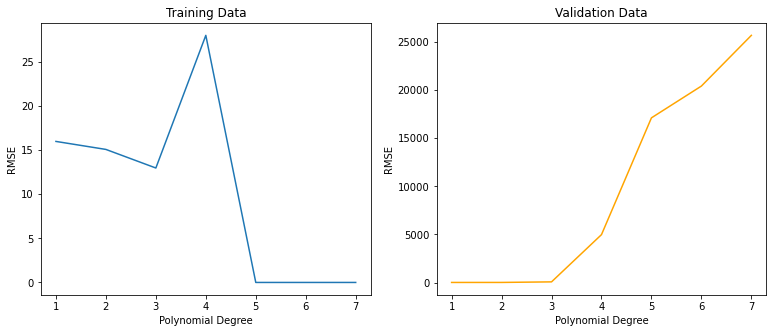

In [54]:
# Run this cell without changes

# Create lists of RMSE values
train_rmse = []
val_rmse = []

# Create list of degrees we want to consider
degrees = list(range(1,8))

for degree in degrees:
    # Create transformer of relevant degree and transform X_train
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    baseline_model.fit(X_train_poly, y_train)
    
    # RMSE for training data
    y_pred_poly = baseline_model.predict(X_train_poly)
    train_rmse.append(mean_squared_error(y_train, y_pred_poly, squared=False))
    
    # RMSE for validation data
    poly_cv = cross_val_score(baseline_model, X_train_poly, y_train, scoring="neg_root_mean_squared_error")
    val_rmse.append(-(poly_cv.mean()))

# Set up plot
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,5))

# Plot RMSE for training data
ax1.plot(degrees, train_rmse)
ax1.set_title("Training Data")

# Plot RMSE for validation data
ax2.plot(degrees, val_rmse, color="orange")
ax2.set_title("Validation Data")

# Shared attributes for plots
for ax in (ax1, ax2):
    ax.set_xticks(degrees)
    ax.set_xlabel("Polynomial Degree")
    ax.set_ylabel("RMSE")

Based on the above graphs, let's plan to use a polynomial degree of 5. Why? Because that is where the RMSE for the training data has dropped down to essentially zero, meaning we are close to perfectly overfitting on the training data.

(This is a design decision where there isn't always a single right answer. Later we will introduce a tool called "grid search" that will allow you to tune multiple aspects of the model at once instead of having to choose one step at a time like this.)

In [55]:
# Run this cell without changes

# Create transformer of relevant degree and transform X_train
poly = PolynomialFeatures(5)
X_train_poly = poly.fit_transform(X_train)
baseline_model.fit(X_train_poly, y_train)

# RMSE for training data
y_pred_poly = baseline_model.predict(X_train_poly)
final_poly_rmse = mean_squared_error(y_train, y_pred_poly, squared=False)

# RMSE for validation data
poly_cv = cross_val_score(baseline_model, X_train_poly, y_train, scoring="neg_root_mean_squared_error")
final_poly_cv_rmse = -(poly_cv.mean())

In [56]:
# Run this cell without changes

print("Baseline Model")
print("Train RMSE:", baseline_rmse)
print("Validation RMSE:", baseline_cv_rmse)
print()
print("Model with Polynomial Transformation (Degree 5)")
print("Train RMSE:", final_poly_rmse)
print("Validation RMSE:", final_poly_cv_rmse)

Baseline Model
Train RMSE: 15.97633456376879
Validation RMSE: 15.953844849875594

Model with Polynomial Transformation (Degree 5)
Train RMSE: 1.668200362124257e-06
Validation RMSE: 17109.831092731452


We have a dramatically improved train RMSE (approximately 16 down to 0) and a dramatically worsened validation RMSE (approximately 16 up to 17,000). At this point we are clearly overfitting, but we have successfully reduced the underfitting on the training dataset.

In the next step, let's apply a technique to address this overfitting.

## 4. Use Regularization to Reduce Overfitting

Let's use regularization to address this overfitting, specifically using the `Ridge` model from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)), which uses the L2 norm.

### Scaling the Data

Because L2 regularization is distance-based, we need to scale our data before passing it into this model. In the cell below, instantiate a `StandardScaler` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)) and fit then transform the full `X_train_poly`.

In [57]:
# Replace None with appropriate code

# Import the relevant class
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Fit the scaler on X_train_poly
scaler.fit(X_train_poly)

# Transform the data and create a new matrix
X_train_scaled = scaler.transform(X_train_poly)

The scaled data should have the same shape as `X_train_poly` but the values should be different:

In [58]:
# Run this cell without changes

assert X_train_scaled.shape == X_train_poly.shape
assert X_train_scaled[0][0] != X_train_poly[0][0]

### Fitting a Ridge Model

In the cell below, instantiate a `Ridge` model with `random_state=42`, then fit it on `X_train_scaled` and `y_train`.

In [60]:
# Replace None with appropriate code

# Import the relevant class
from sklearn.linear_model import Ridge

# Instantiate the model with random_state=42
ridge_model = Ridge(random_state = 42)

# Fit the model
ridge_model.fit(X_train_scaled, y_train)

Ridge(random_state=42)

### Metrics for Ridge Model

Now, find the train and cross-validated RMSE values, and assign them to `ridge_rmse` and `ridge_cv_rmse` respectively. You can refer back to previous steps to remember how to do this! Remember to use `ridge_model` and `X_train_scaled`.

In [62]:
# Your code here
y_ridge_pred = ridge_model.predict(X_train_scaled)

# RMSE
ridge_rmse = mean_squared_error(y_train, y_ridge_pred, squared = False)

# Ridge cv score
ridge_cv = cross_val_score(ridge_model, X_train_scaled, y_train, scoring = "neg_root_mean_squared_error")
ridge_cv_rmse = -(ridge_cv.mean())

print("Train RMSE:", ridge_rmse)
print("Validation RMSE:", ridge_cv_rmse)

Train RMSE: 15.239908470525004
Validation RMSE: 16.05321975746058


Your train RMSE should be about 15.24, and validation RMSE should be about 16.05:

In [63]:
# Run this cell without changes

assert round(ridge_rmse, 2) == 15.24
assert round(ridge_cv_rmse, 2) == 16.05

### Analysis of Model with Regularization

The following cell shows metrics for each model so far:

In [64]:
# Run this cell without changes

print("Baseline Model")
print("Train RMSE:", baseline_rmse)
print("Validation RMSE:", baseline_cv_rmse)
print()
print("Model with Polynomial Transformation (Degree 5)")
print("Train RMSE:", final_poly_rmse)
print("Validation RMSE:", final_poly_cv_rmse)
print()
print("Model with Polynomial Transformation + Regularization")
print("Train RMSE:", ridge_rmse)
print("Validation RMSE:", ridge_cv_rmse)

Baseline Model
Train RMSE: 15.97633456376879
Validation RMSE: 15.953844849875594

Model with Polynomial Transformation (Degree 5)
Train RMSE: 1.668200362124257e-06
Validation RMSE: 17109.831092731452

Model with Polynomial Transformation + Regularization
Train RMSE: 15.239908470525004
Validation RMSE: 16.05321975746058


Did we successfully reduce overfitting? Which model is the best model so far?

---

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

Compared to the model with the polynomial transformation, yes, we successfully reduced overfitting. We can tell because the gap between the train and validation RMSE got a lot smaller.

At this point, our best model is actually still the baseline model. Even though we have a lower RMSE for the training data with both the model with polynomial transformation and the model with regularization added, the validation RMSE was still lowest for the baseline model.
    
</details>

Let's try adding stronger regularization penalties, to see if we can reduce the overfitting a bit further while still keeping the improvements to underfitting that we got from the polynomial features transformation.

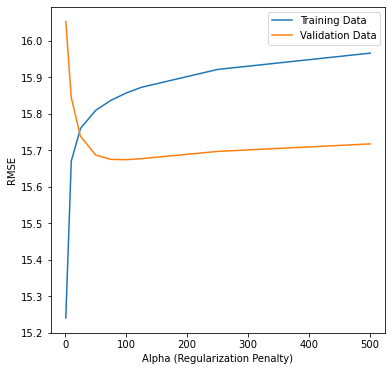

In [65]:
# Run this cell without changes

# Create lists of RMSE values
train_rmse = []
val_rmse = []

# Create list of alphas we want to consider
alphas = [1, 10, 25, 50, 75, 100, 125, 250, 500]

for alpha in alphas:
    # Fit a model with a given regularization penalty
    model = Ridge(random_state=42, alpha=alpha)
    model.fit(X_train_scaled, y_train)
    
    # RMSE for training data
    y_pred_ridge = model.predict(X_train_scaled)
    train_rmse.append(mean_squared_error(y_train, y_pred_ridge, squared=False))
    
    # RMSE for validation data
    ridge_cv = cross_val_score(model, X_train_scaled, y_train, scoring="neg_root_mean_squared_error")
    val_rmse.append(-(ridge_cv.mean()))

# Plot train vs. validation RMSE
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(alphas, train_rmse, label="Training Data")
ax.plot(alphas, val_rmse, label="Validation Data")
ax.set_xlabel("Alpha (Regularization Penalty)")
ax.set_ylabel("RMSE")
ax.legend();

(This time both are plotted on the same axes because the RMSE has the same order of magnitude.)

As we increase the alpha (regularization penalty) along the x-axis, first we can see a big drop in the validation RMSE, then as we keep penalizing more, eventually the RMSE for both the training and validation data starts increasing (meaning we are starting to underfit again).

The code below finds the best alpha value from our list, i.e. the alpha that results in the lowest RMSE for the validation data:

In [66]:
# Run this cell without changes

lowest_rmse = min(val_rmse)
print("Lowest RMSE:", lowest_rmse)

best_alpha = alphas[val_rmse.index(lowest_rmse)]
print("Best alpha:", best_alpha)

Lowest RMSE: 15.674064966813981
Best alpha: 100


Let's build a final model using that alpha value and compare it to our previous models:

In [67]:
# Run this cell without changes

# Fit a model with a given regularization penalty
final_model = Ridge(random_state=42, alpha=best_alpha)
final_model.fit(X_train_scaled, y_train)

# RMSE for training data
y_pred_final = final_model.predict(X_train_scaled)
final_rmse = mean_squared_error(y_train, y_pred_final, squared=False)

# RMSE for validation data
final_cv = cross_val_score(final_model, X_train_scaled, y_train, scoring="neg_root_mean_squared_error")
final_cv_rmse = -(final_cv.mean())

In [68]:
# Run this cell without changes

print("Baseline Model")
print("Train RMSE:", baseline_rmse)
print("Validation RMSE:", baseline_cv_rmse)
print()
print("Model with Polynomial Transformation (Degree 5)")
print("Train RMSE:", final_poly_rmse)
print("Validation RMSE:", final_poly_cv_rmse)
print()
print("Final Model with Polynomial Transformation + Regularization")
print("Train RMSE:", final_rmse)
print("Validation RMSE:", final_cv_rmse)

Baseline Model
Train RMSE: 15.97633456376879
Validation RMSE: 15.953844849875594

Model with Polynomial Transformation (Degree 5)
Train RMSE: 1.668200362124257e-06
Validation RMSE: 17109.831092731452

Final Model with Polynomial Transformation + Regularization
Train RMSE: 15.856878191991063
Validation RMSE: 15.674064966813981


### Choosing a Final Model

While we have already labeled a model as `final_model` above, make sure you understand why: this is the model with the best (lowest) validation RMSE. We also improved the train RMSE somewhat as well, meaning that our modeling strategy has actually reduced both underfitting and overfitting!

The impact of the changes made so far has been minimal, which makes sense given our business context. We are trying to predict blood pressure based on proxy measurements that leave out a lot of important information! But we still did see some improvement over the baseline by applying polynomial feature transformation and regularization.

## 5. Evaluate a Final Model on the Test Set

Often our lessons leave out this step because we are focused on other concepts, but if you were to present your final model to stakeholders, it's important to perform one final analysis on truly unseen data to make sure you have a clear idea of how the model will perform in the field.

### Instantiating the Final Model

Unless you are using a model that is very slow to fit, it's a good idea to re-create it from scratch prior to the final evaluation. That way you avoid any artifacts of how you iterated on the model previously.

In the cell below, instantiate a `Ridge` model with `random_state=42` and `alpha=100`.

In [69]:
# Replace None with appropriate code

final_model = Ridge(random_state = 42, alpha = 100)

### Fitting the Final Model on the Training Data

You can go ahead and use the `X_train_scaled` and `y_train` data we created earlier.

In [70]:
# Your code here
final_model.fit(X_train_scaled, y_train)

Ridge(alpha=100, random_state=42)

### Preprocessing the Test Set

The training data for our final model was transformed in two ways:

1. Polynomial features added by the `poly` transformer object
2. Scaled by the `scaler` transformer object

In the cell below, transform the test data in the same way, with the same transformer objects. Do NOT re-instantiate or re-fit these objects.

In [72]:
# Replace None with appropriate code

# Add polynomial features
X_test_poly = poly.fit_transform(X_test)

# Scale data
X_test_scaled = scaler.fit_transform(X_test_poly)

Make sure the shape is correct. If you have too few columns, make sure that you passed the transformed version of `X_test` (`X_test_poly`) to the scaler rather than just `X_test`.

In [73]:
# Run this cell without changes

assert X_test_scaled.shape == (56, 252)

### Evaluating RMSE with Final Model and Preprocessed Test Set

This time we don't need to use cross-validation, since we are using the test set. In the cell below, generate predictions for the test data then use `mean_squared_error` with `squared=False` to find the RMSE for our holdout test set.

In [74]:
# Replace None with appropriate code

# Generate predictions
y_pred_test = final_model.predict(X_test_scaled)

# Find RMSE
test_rmse = mean_squared_error(y_test, y_pred_test, squared = False)
test_rmse

12.181810203720268

### Interpreting Our Results

So, we successfully used polynomial features transformation and regularization to improve our metrics. But, can we recommend that this model be used for the purpose of predicting blood pressure based on these features?

Let's create a scatter plot of actual vs. predicted blood pressure, with the boundaries of high blood pressure indicated:

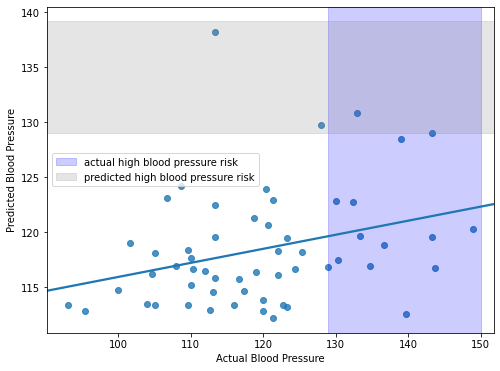

In [75]:
# Run this cell without changes
import seaborn as sns

# Set up plot
fig, ax = plt.subplots(figsize=(8,6))

# Seaborn scatter plot with best fit line
sns.regplot(x=y_test, y=y_pred_test, ci=None, truncate=False, ax=ax)
ax.set_xlabel("Actual Blood Pressure")
ax.set_ylabel("Predicted Blood Pressure")

# Add spans showing high blood pressure + legend
ax.axvspan(129, max(y_test) + 1, alpha=0.2, color="blue", label="actual high blood pressure risk")
ax.axhspan(129, max(y_pred_test) + 1, alpha=0.2, color="gray", label="predicted high blood pressure risk")
ax.legend();

In general, as the true blood pressure values increase, so do the predicted blood pressure values. So, it's clear that our model is picking up on *some* information from our features.

But it looks like this model does not actually solve the initial business problem very well. Recall that our question was: ***can we predict blood pressure using just a scale and a tape measure?*** Our model would incorrectly flag one person as being at risk of high blood pressure, while missing all of the people who actually are at risk of high blood pressure.

It is possible that some other model algorithm (e.g. k-nearest neighbors or decision trees) would do a better job of picking up on the underlying patterns in this dataset. Or if we set this up as a classification problem rather than a regression problem, if we're only interested in flagging high blood pressure rather than predicting blood pressure in general.

But if we had to stop this analysis now in its current state, we would need to conclude that **while we were able to pick up some information about blood pressure using these variables alone, we did not produce a model that would work for this business case**.

This is something that happens sometimes — not every target can be predicted with the features you have been given! In this case, maybe your model would still be useful for epidemiological modeling (predicting the blood pressure in populations) rather than predicting blood pressure for an individual, since we are picking up on some information. Further study would be needed to determine the feasibility of this approach.

## Summary

In this cumulative lab, you performed an end-to-end machine learning process with correct usage of training, validation, and test data. You identified underfitting and overfitting and applied strategies to address them. Finally, you evaluated your final model using test data, and interpreted those results in the context of a business problem.